# DEMO: **Mean Shift Clustering**
<u>Nội dung</u>:  
1. Iris Segmentation với Mean Shift
2. Customer Segmentation bằng Mean Shift     
3. 

<u>Cập nhật</u>: **04/2025**

---
### **MÔI TRƯỜNG TRIỂN KHAI ỨNG DỤNG**
---

In [1]:
folder = r'C:\Users\USER\Downloads\chương trình học UEH\môn học kì 4\Machine Learning\Project MeanShift\Team\Mean_Shift_Clustering'

In [ ]:
import sys
sys.path.append(folder)

import joblib as jlb
import seaborn as sns
import cv2
import matplotlib.pyplot    as plt
import numpy                as np
import pandas               as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster        import MeanShift, estimate_bandwidth
from sklearn.metrics        import silhouette_score, silhouette_samples
from collections            import Counter
import matplotlib.cm        as cm
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

---
## 1. **Iris Segmentation với Mean Shift**
---

In [3]:
data1 = pd.read_csv(folder + r'/Data/Iris.csv')
pd.set_option('display.width', 1000)

# Quan sát sơ bộ dữ liệu
X = data1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = pd.get_dummies(X, drop_first= True)
print('Dữ liệu đầu vào:')
print(X.head(10))

# Quan sát phân bố Species thực tế
print('\nPhân bố Species thực tế:')
print(data1.groupby('Species').size())

Dữ liệu đầu vào:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
5            5.4           3.9            1.7           0.4
6            4.6           3.4            1.4           0.3
7            5.0           3.4            1.5           0.2
8            4.4           2.9            1.4           0.2
9            4.9           3.1            1.5           0.1

Phân bố Species thực tế:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [4]:
# Ước lượng bandwidth và dùng quantile điều chỉnh độ nhạy
bandwidth = estimate_bandwidth(X, quantile=0.3, n_samples=500)
print(bandwidth)

1.2032034114912578


In [5]:
##------------------------------------------------------------------------------
## Xây dựng mô hình Mean Shift
##------------------------------------------------------------------------------  
model1 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model1.fit(X)

MeanShift(bandwidth=np.float64(1.2032034114912578), bin_seeding=True)

In [6]:
# Lưu trữ mô hình để khai thác về sau
jlb.dump(model1, folder + '/Output/MeanShift_dataset1.mdl')

['C:\\Users\\USER\\Downloads\\chương trình học UEH\\môn học kì 4\\Machine Learning\\Project MeanShift\\Team\\Mean_Shift_Clustering/Output/MeanShift_dataset1.mdl']

In [7]:
# Khai thác mô hình đã được xây dựng
model1 = jlb.load(folder + '/Output/MeanShift_dataset1.mdl')

In [8]:
data1['cluster'] = model1.labels_
n_clusters = len(np.unique(model1.labels_))
centroids = model1.cluster_centers_

print(f'\nSố cụm tìm được: {n_clusters}')
print()
print(f'Trọng tâm các cụm:\n{centroids}')


Số cụm tìm được: 2

Trọng tâm các cụm:
[[6.21142857 2.89285714 4.85285714 1.67285714]
 [5.01632653 3.44081633 1.46734694 0.24285714]]


In [9]:
data1['cluster'] = model1.labels_
print('\nKết quả gom cụm:')
print(data1.head(70))
print('\nKích thước các cụm:', Counter(model1.labels_))
print('Cụm lớn nhất:', Counter(model1.labels_).most_common(1))


Kết quả gom cụm:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species  cluster
0    1            5.1           3.5            1.4           0.2      Iris-setosa        1
1    2            4.9           3.0            1.4           0.2      Iris-setosa        1
2    3            4.7           3.2            1.3           0.2      Iris-setosa        1
3    4            4.6           3.1            1.5           0.2      Iris-setosa        1
4    5            5.0           3.6            1.4           0.2      Iris-setosa        1
..  ..            ...           ...            ...           ...              ...      ...
65  66            6.7           3.1            4.4           1.4  Iris-versicolor        0
66  67            5.6           3.0            4.5           1.5  Iris-versicolor        0
67  68            5.8           2.7            4.1           1.0  Iris-versicolor        0
68  69            6.2           2.2            4.5           1.5  Iris-v

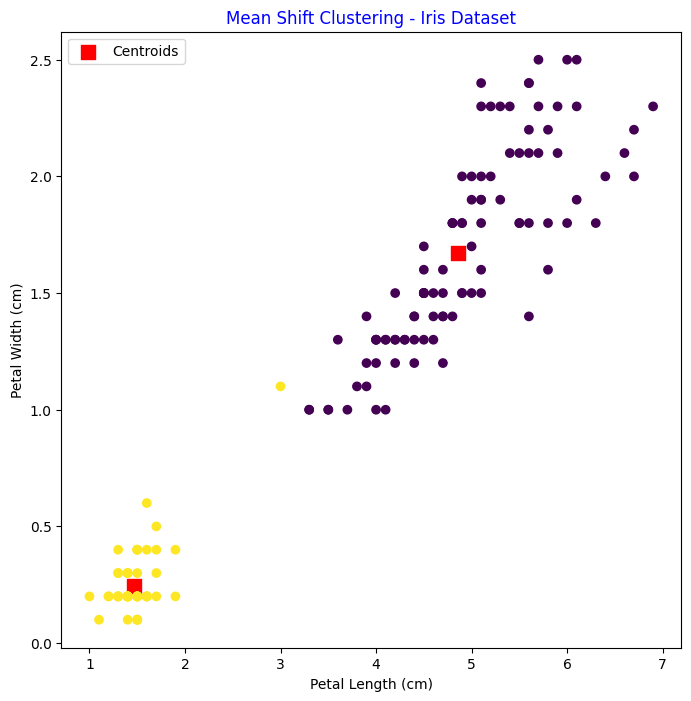

In [ ]:
# Biểu diễn trực quan với PetalLengthCm và PetalWidthCm
plt.figure(figsize=(8, 8))
plt.scatter(centroids[:, 2], centroids[:, 3], 
            marker='s', s=100, color='red', label='Centroids')
plt.scatter(data1['PetalLengthCm'], data1['PetalWidthCm'], c=data1['cluster'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Mean Shift Clustering - Iris Dataset', color='blue')
plt.legend()
plt.show()

---
## 2. **Customer Segmentation với Mean Shift**
---

In [ ]:
data2 = pd.read_csv(folder + r'/Data/Mall_Customers.csv')
# Chỉ lấy các đặc trưng số để gom cụm
X = data2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
print('Dữ liệu đầu vào:')
print(X.head(10))

## Quan sát phân bố Gender thực tế
print('\nPhân bố Gender thực tế:')
print(data2.groupby('Gender').size())

Dữ liệu đầu vào:
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40
5   22                  17                      76
6   35                  18                       6
7   23                  18                      94
8   64                  19                       3
9   30                  19                      72

Phân bố Gender thực tế:
Gender
Female    112
Male       88
dtype: int64


In [12]:
# Ước lượng bandwidth
# Điều chỉnh n_samples theo kích thước dữ liệu
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=200)
print(f'Bandwidth ước lượng: {bandwidth}')

Bandwidth ước lượng: 22.173844534734855


In [13]:
model2 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model2.fit(X)

MeanShift(bandwidth=np.float64(22.173844534734855), bin_seeding=True)

In [14]:
# Lưu trữ mô hình để khai thác về sau
jlb.dump(model2, folder + '/Output/MeanShift_dataset2.mdl')

['C:\\Users\\USER\\Downloads\\chương trình học UEH\\môn học kì 4\\Machine Learning\\Project MeanShift\\Team\\Mean_Shift_Clustering/Output/MeanShift_dataset2.mdl']

In [15]:
# Khai thác mô hình đã được xây dựng
model2 = jlb.load(folder + '/Output/MeanShift_dataset2.mdl')

In [ ]:
data2['cluster'] = model2.labels_
n_clusters = len(np.unique(model2.labels_))
centroids = model2.cluster_centers_

print(f'\nSố cụm tìm được: {n_clusters}')
print()
print(f'Trọng tâm các cụm:\n{centroids}')


Số cụm tìm được: 5

Trọng tâm các cụm:
[[36.48333333 54.81666667 49.85      ]
 [32.70967742 79.77419355 82.48387097]
 [45.76       83.4        17.64      ]
 [24.61904762 26.80952381 76.66666667]
 [45.52941176 28.29411765 20.23529412]]


In [17]:
## Kết quả gom cụm
print('\nKết quả gom cụm (5 mẫu đầu tiên):')
print(data2.head())
print('\nKích thước các cụm:', Counter(model2.labels_))
print('Cụm lớn nhất:', Counter(model2.labels_).most_common(1))


Kết quả gom cụm (5 mẫu đầu tiên):
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0           1    Male   19                  15                      39        4
1           2    Male   21                  15                      81        3
2           3  Female   20                  16                       6        4
3           4  Female   23                  16                      77        3
4           5  Female   31                  17                      40        4

Kích thước các cụm: Counter({np.int64(0): 80, np.int64(1): 39, np.int64(2): 36, np.int64(4): 23, np.int64(3): 22})
Cụm lớn nhất: [(np.int64(0), 80)]


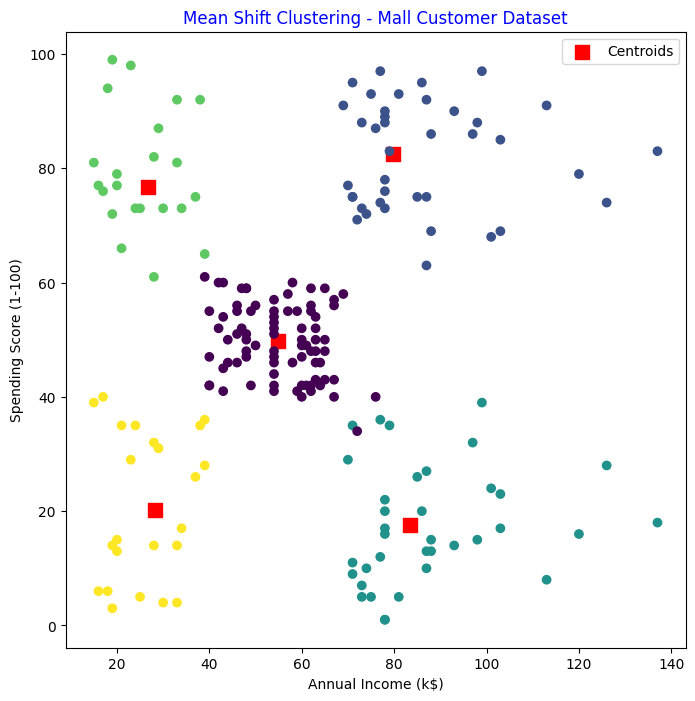

In [ ]:
## Biểu diễn trực quan với Annual Income và Spending Score
plt.figure(figsize=(8, 8))
plt.scatter(centroids[:, 1], centroids[:, 2], 
            marker='s', s=100, color='red', label='Centroids')
plt.scatter(data2['Annual Income (k$)'], data2['Spending Score (1-100)'], c=data2['cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mean Shift Clustering - Mall Customer Dataset', color='blue')
plt.legend()
plt.show()